In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
# data = pd.read_csv("/home/jakejoseph/Desktop/Joseph_Code/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)
#Data from muscle fatigue test
# data = pd.read_csv("Z:/Student Folders/Jake_Joseph/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

In [2]:
#Initialize variables
stimCmds  = [0, 8, 16, 24, 31, 39, 43, 47, 51, 55, 59, 67, 75, 82, 90]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 30
#flip y pixels
# data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [3]:
#moving average
for i in range(1, len(data.columns),3):
    x = data.columns[i]
    y = data.columns[i+1]

    x_ma = data[x].rolling(window=window, min_periods=1).mean()
    y_ma = data[y].rolling(window=window, min_periods=1).mean()

    data[x] = x_ma
    data[y] = y_ma
    
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.383148,405.968872,0.919322,560.443054,451.423004,0.845178,680.284454,463.921844,0.854380,891.703949,272.147705,0.943259,923.445251,77.658703,0.908831
2,2,526.213603,405.807485,0.934166,560.375997,451.047160,0.869647,680.264547,463.489512,0.882482,891.359456,271.702372,0.954656,923.337179,77.470673,0.922121
3,3,526.027115,405.625389,0.945851,560.386932,450.859375,0.842314,680.223145,463.400024,0.835458,890.954315,271.482491,0.965645,923.751999,77.039722,0.924855
4,4,525.870557,405.496991,0.950284,560.362012,450.793402,0.821277,680.271765,463.428009,0.861589,890.926257,271.291461,0.951316,923.726111,77.084532,0.921467


In [ ]:
#low pass filter test

from scipy.signal import butter, filtfilt
import pandas as pd

# Butterworth Low Pass Filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters
cutoff = 2  # increase if the smoothing is too aggressive
fs = 30  
order = 4  # try 4-6 and see what happens

# Apply filter to each relevant column
for i in range(0, len(df.columns), 3):
    x_col = df.columns[i]  # X coordinate column
    y_col = df.columns[i + 1]  # Y coordinate column

    df[x_col] = butter_lowpass_filter(df[x_col], cutoff, fs, order)
    df[y_col] = butter_lowpass_filter(df[y_col], cutoff, fs, order)


ValueError: The length of the input vector x must be greater than padlen, which is 15.

In [4]:
def interpolate(df, x, y, likelihood):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

threshold = 0.75
for i in range(1,len(data.columns),3):
    likelihood = i + 2  
    x_col = i  
    y_col = i + 1  
    interpolate(data, x_col, y_col, likelihood)
data.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.383148,405.968872,0.919322,560.443054,451.423004,0.845178,680.284454,463.921844,0.854380,891.703949,272.147705,0.943259,923.445251,77.658703,0.908831
2,2,526.213603,405.807485,0.934166,560.375997,451.047160,0.869647,680.264547,463.489512,0.882482,891.359456,271.702372,0.954656,923.337179,77.470673,0.922121
3,3,526.027115,405.625389,0.945851,560.386932,450.859375,0.842314,680.223145,463.400024,0.835458,890.954315,271.482491,0.965645,923.751999,77.039722,0.924855
4,4,525.870557,405.496991,0.950284,560.362012,450.793402,0.821277,680.271765,463.428009,0.861589,890.926257,271.291461,0.951316,923.726111,77.084532,0.921467


In [9]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)
    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [6]:
wrist_likelihood = (data.iloc[:][data.columns[3]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[12]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[18]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3

IndexError: index 18 is out of bounds for axis 0 with size 16

In [7]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

In [ ]:
from scipy.io import loadmat

data = loadmat('/home/jakejoseph/Desktop/Joseph_Code/mattAngles.mat')
wa = data['wa']
pa = data['pa']
ma = data['fa']
stimTimes = data['stimTimes']

print(stimTimes[0])


[ 21  28  35  41  57  64  75  81  88  94 101 109 116 124 133 140]


In [ ]:
stimTimes = stimTimes[0]
scaledStimTimes = [x*30 for x in stimTimes]
print(scaledStimTimes)

[630, 840, 1050, 1230, 1710, 1920, 2250, 2430, 2640, 2820, 3030, 3270, 3480, 3720, 3990, 4200]


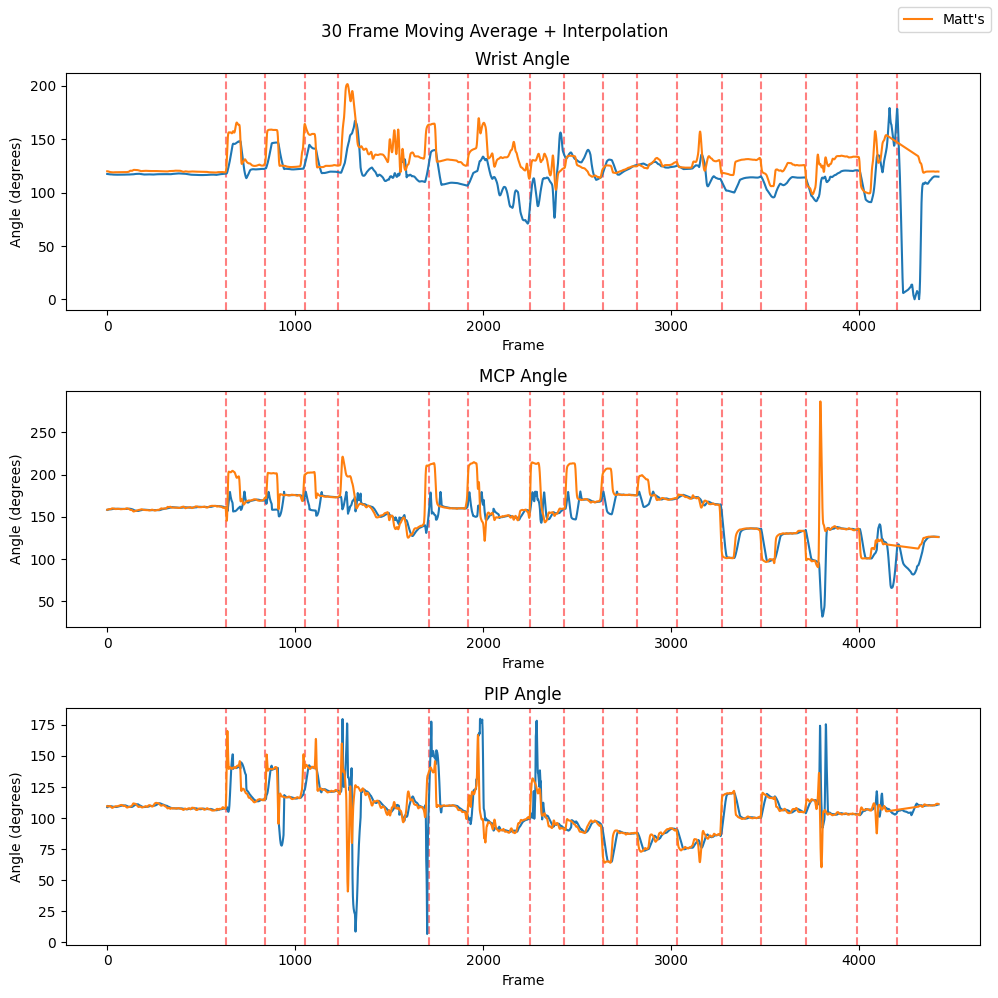

In [ ]:
#Plotting Angles over Time
fig, axs = plt.subplots(3,1, figsize=(10,10))

for time in scaledStimTimes:
    axs[0].axvline(x=time,color='r', ls = '--' , alpha=0.5)
    axs[1].axvline(x=time, ls = '--',color='r', alpha=0.5)
    axs[2].axvline(x=time, ls = '--' ,color='r',alpha=0.5)


axs[0].plot(wristAngle)
axs[0].plot(wa[0], label="Matt's")
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("Angle (degrees)")

axs[1].plot(mcpAngle)
axs[1].plot(ma[0])
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Angle (degrees)")

axs[2].plot(pipAngle)
axs[2].plot(pa[0])
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Frame")
axs[2].set_ylabel("Angle (degrees)")
fig.suptitle("30 Frame Moving Average + Interpolation")
fig.legend()
plt.tight_layout()
plt.show()



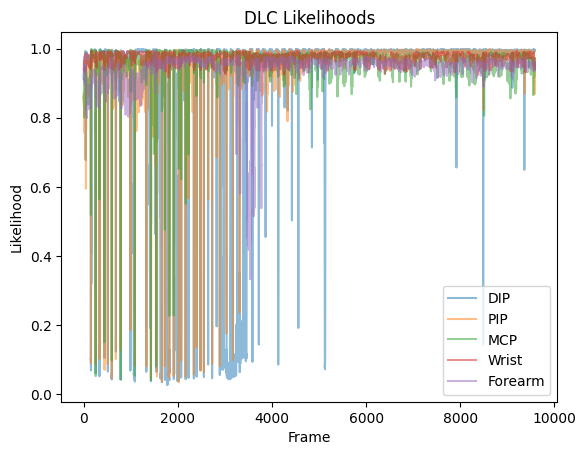

In [ ]:
plt.plot(data.iloc[:][data.columns[3]], label = 'DIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[6]], label = 'PIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[9]], label = 'MCP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[12]], label = 'Wrist', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[15]], label = 'Forearm', alpha = 0.5)
plt.title("DLC Likelihoods")
plt.ylabel("Likelihood")
plt.xlabel("Frame")
plt.legend()
plt.show()

In [14]:
wrist_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[3]])/3


# Create a custom colormap from green to red
colors = [(1, 0, 0), (0, 1, 0)]  # Green to Red
n_bins = 100  # Discretizes the interpolation into bins
# cmap = LinearSegmentedColormap.from_list("GreenRed", colors, N=n_bins) #use seaborn color palette or matplotlib color palette
cmap = 'plasma'
print(pip_likelihood)

0       0.876012
1       0.872960
2       0.895432
3       0.874541
4       0.877716
          ...   
9581    0.970702
9582    0.958493
9583    0.956337
9584    0.940079
9585    0.965100
Length: 9586, dtype: float64


In [10]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


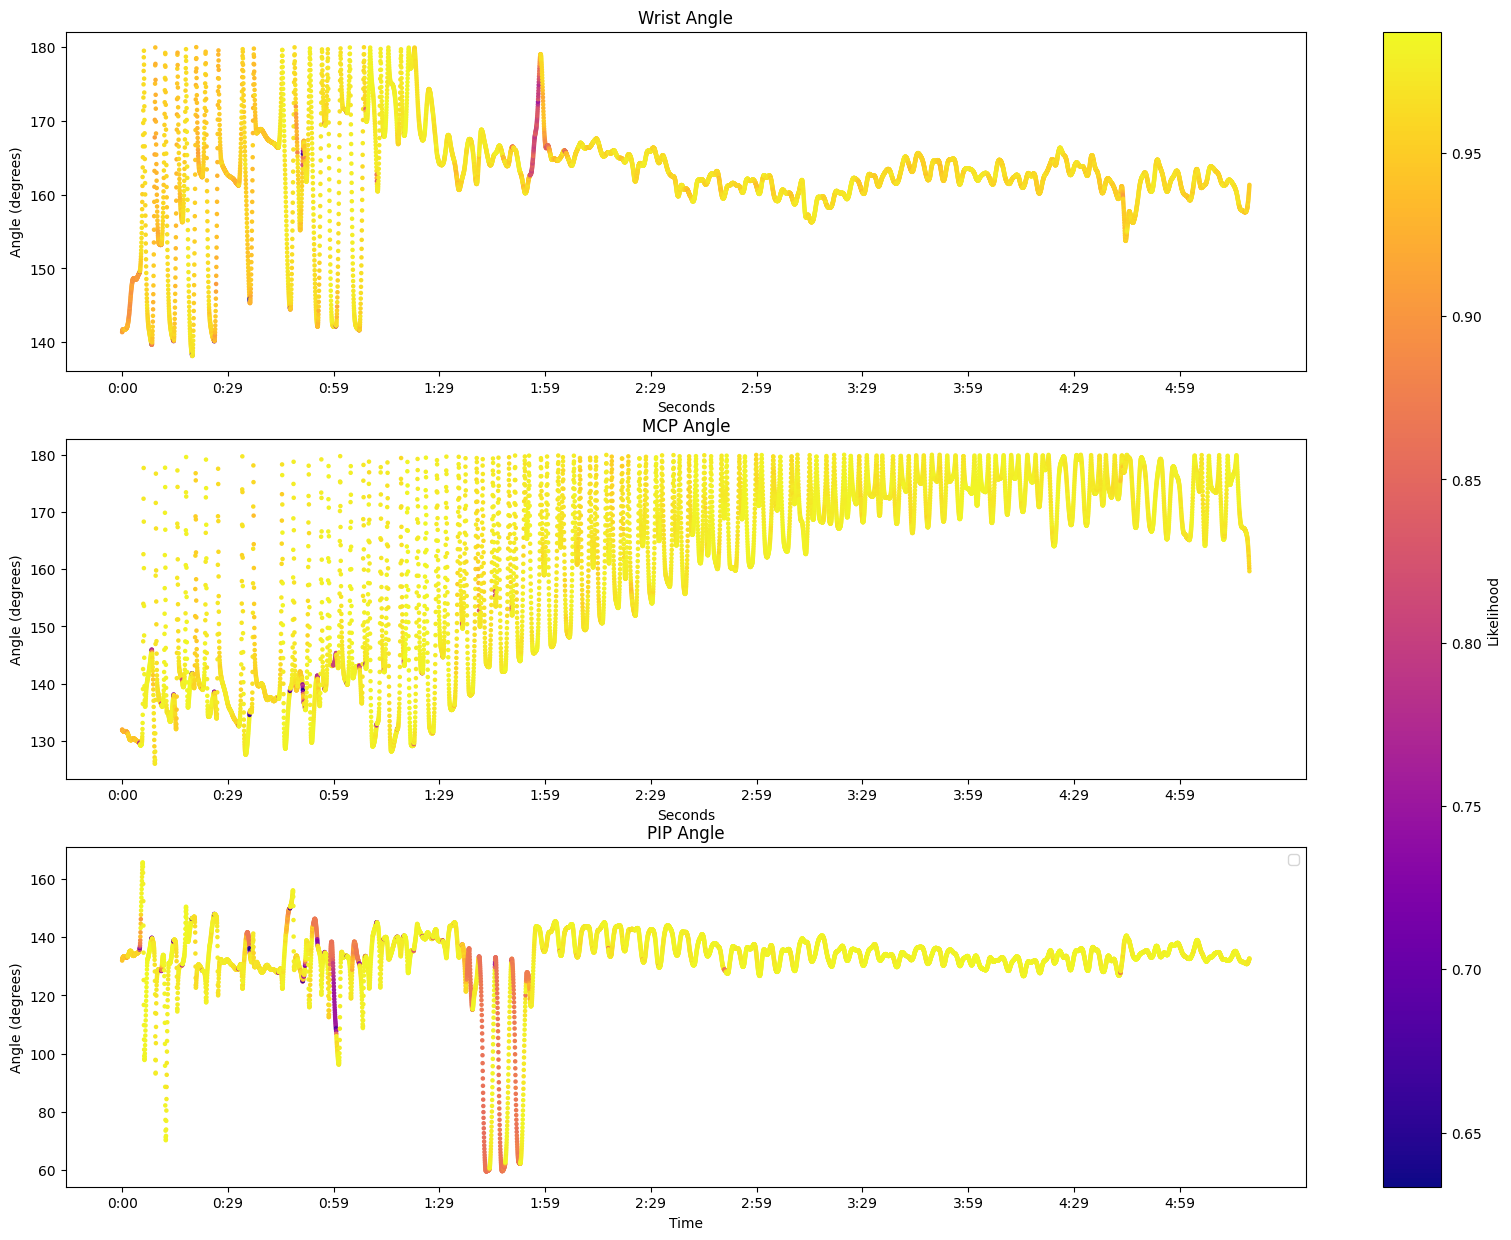

In [37]:
#Plotting Angles over Time

# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 30 # seconds
slicing_indices = np.arange(0, len(time), slice_interval * fps).astype(int)

fig, axs = plt.subplots(3,1, figsize=(20,15))

scatter1 = axs[0].scatter(time,wristAngle, c = wrist_likelihood,cmap = cmap,s=5)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Seconds")
axs[0].set_ylabel("Angle (degrees)")
axs[0].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# plt.colorbar()


axs[1].scatter(time,mcpAngle, c = mcp_likelihood,cmap = cmap,s=5)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Angle (degrees)")
axs[1].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])


axs[2].scatter(time,pipAngle, c = pip_likelihood,cmap = cmap,s=5)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Angle (degrees)")
axs[2].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# axs[2].fill_between(time, min(pipAngle), max(pipAngle), where=(time >= 110) & (time <= 140), color='grey', alpha=0.3, label='Camera Shift')
plt.legend()
cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Likelihood')
# fig.suptitle("Muscle Fatigue Test")
# plt.tight_layout()

plt.show()

In [44]:
# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30

# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

# Calculate slicing indices
slicing_indices = [0]  # Start with the 0 second index
n = 0
while True:
    next_index = int((30 * n) * fps)  # The corrected formula
    if next_index >= len(time):
        break
    slicing_indices.append(next_index)
    n += 1
slicing_indices = np.array(slicing_indices)


# def frame_to_time_mm_ss(frame, fps=30):
#     total_seconds = frame / fps
#     minutes = int(total_seconds // 60)
#     seconds = int(total_seconds % 60)
#     return f"{minutes:02d}:{seconds:02d}"

# time_labels_mm_ss = [frame_to_time_mm_ss(frame) for frame in time]

In [55]:
# Time array (in seconds)
time = (np.arange(len(wristAngle)) / 30) +1
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 30 # seconds
slicing_indices = np.arange(0, len(time), slice_interval * fps).astype(int)

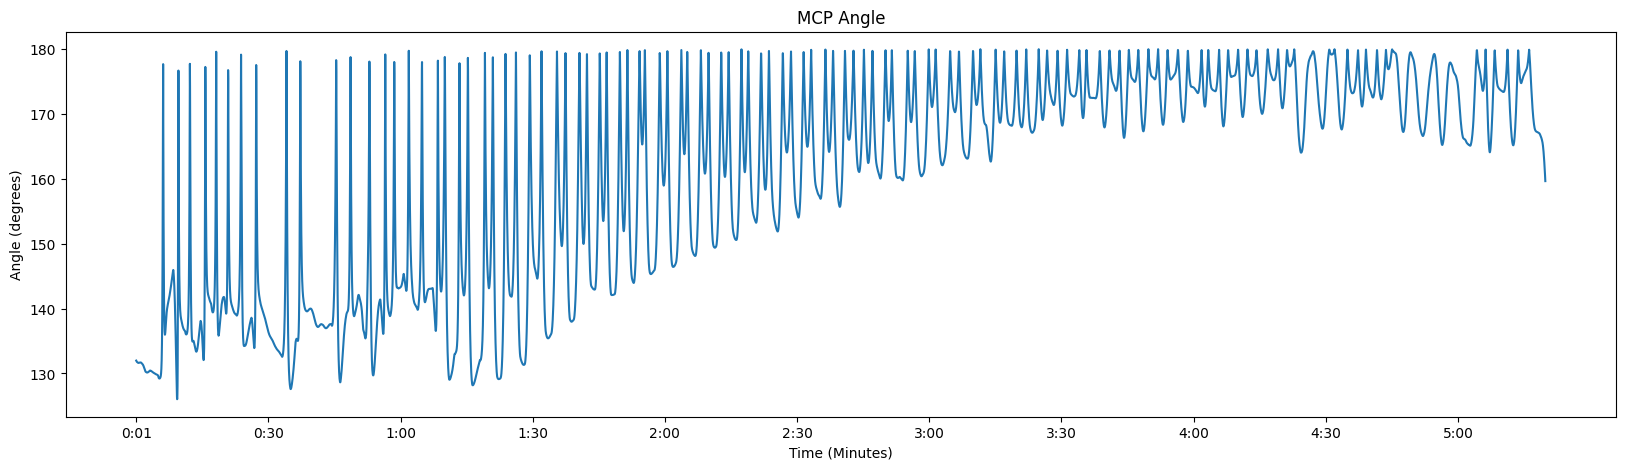

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(20,5))
plt.plot(time,mcpAngle)
plt.title("MCP Angle")
plt.xlabel("Time (Minutes)")
plt.ylabel("Angle (degrees)")
plt.xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
plt.show()
plt.savefig('MCP.svg', format='svg')

In [ ]:
# Taking a 1 second window around each stim command (30 fps)
wristStim = [np.mean(wristAngle[max(i-15, 0):min(i+15, len(wristAngle))]) for i in useFramesMove]
mcpStim = [np.mean(mcpAngle[max(i-15, 0):min(i+15, len(mcpAngle))]) for i in useFramesMove]
pipStim = [np.mean(pipAngle[max(i-15, 0):min(i+15, len(pipAngle))]) for i in useFramesMove]


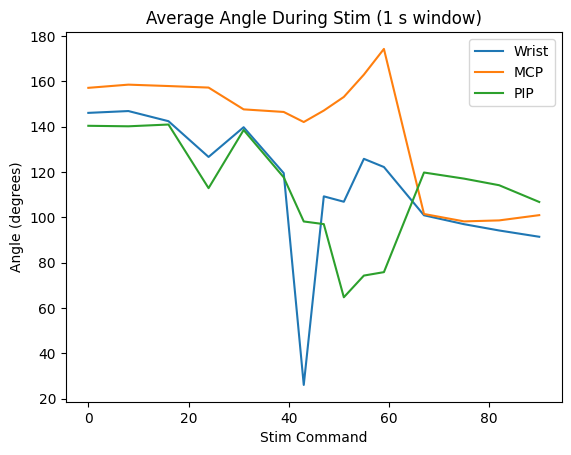

In [ ]:
plt.plot(stimCmds, wristStim, label="Wrist")
plt.plot(stimCmds, mcpStim, label="MCP")
plt.plot(stimCmds, pipStim, label="PIP")
plt.legend()
plt.xlabel("Stim Command")
plt.ylabel("Angle (degrees)")
plt.title("Average Angle During Stim (1 s window)")
plt.show()

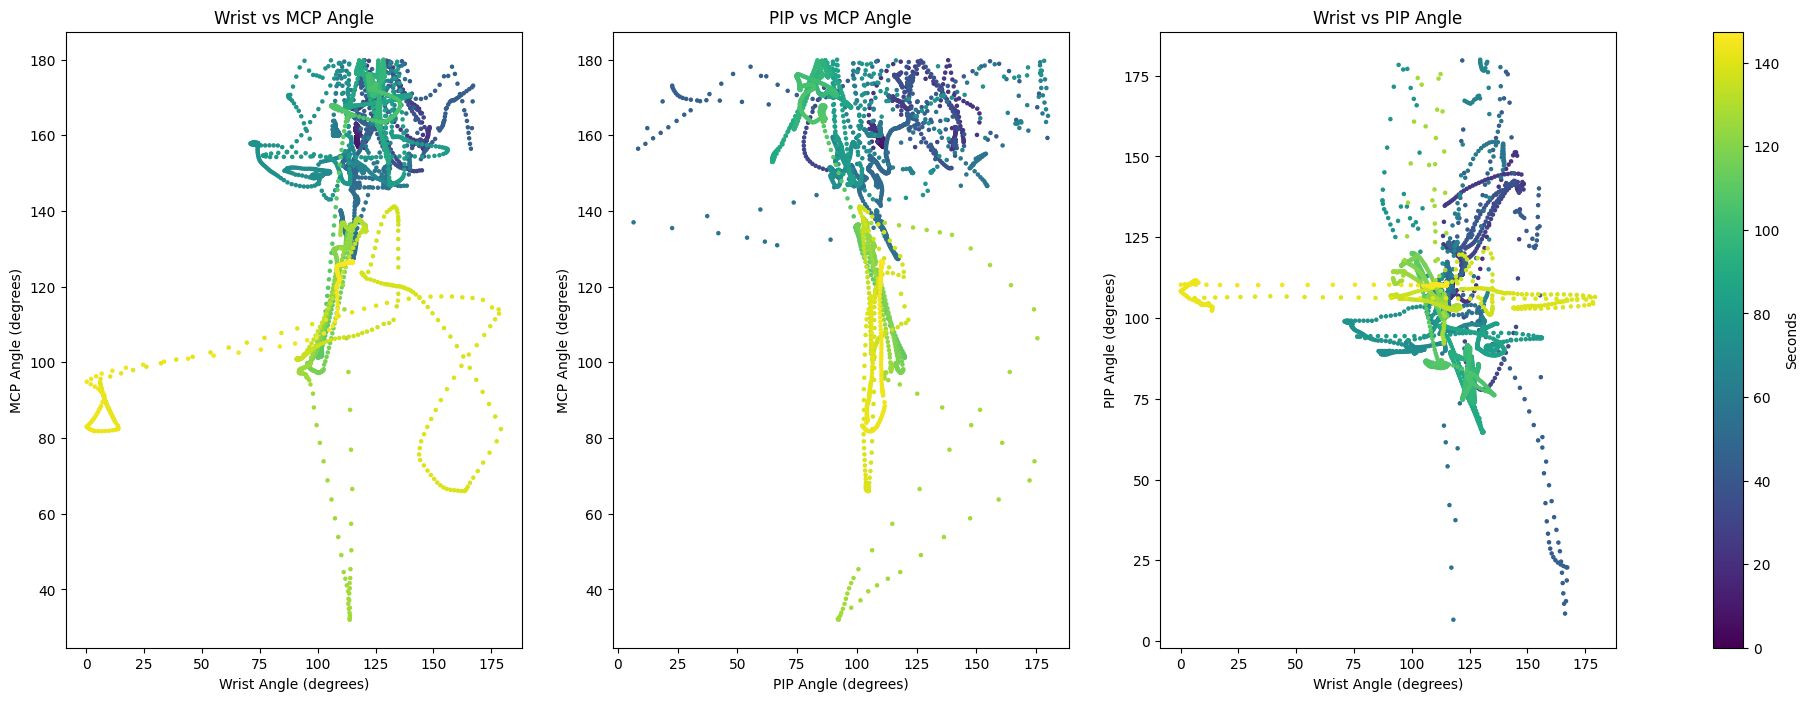

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25,8))

scatter1 = axs[0].scatter(wristAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[0].set_title("Wrist vs MCP Angle")
axs[0].set_xlabel("Wrist Angle (degrees)")
axs[0].set_ylabel("MCP Angle (degrees)")

axs[1].scatter(pipAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[1].set_title("PIP vs MCP Angle")
axs[1].set_xlabel("PIP Angle (degrees)")
axs[1].set_ylabel("MCP Angle (degrees)")

axs[2].scatter(wristAngle,pipAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[2].set_title("Wrist vs PIP Angle")
axs[2].set_xlabel("Wrist Angle (degrees)")
axs[2].set_ylabel("PIP Angle (degrees)")

cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Seconds')

plt.show()

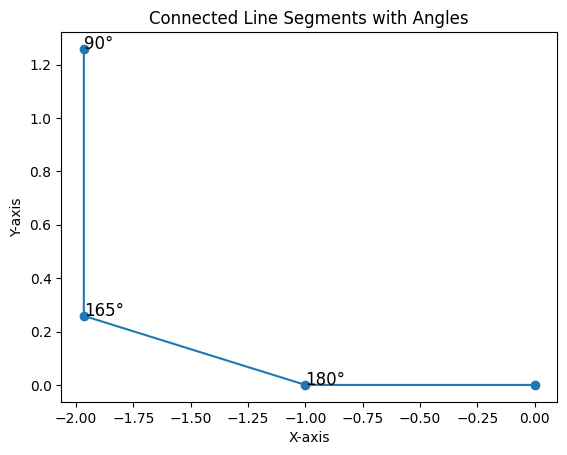

In [60]:
# trying to plot angles on a skeleton

angles_degrees = [180, 165, 90]
angles_radians = [np.radians(x) for x in angles_degrees]
x=[0]
y=[0]

for angle in angles_radians:
    x.append(x[-1] + np.cos(angle))
    y.append(y[-1] + np.sin(angle))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line segments
ax.plot(x, y, marker='o')

# Add labels to the angles
for i, angle in enumerate(angles_degrees):
    ax.text(x[i+1], y[i+1], f'{angle}°', fontsize=12)

# Add titles and labels
ax.set_title('Connected Line Segments with Angles')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


<class 'pandas.core.series.Series'>


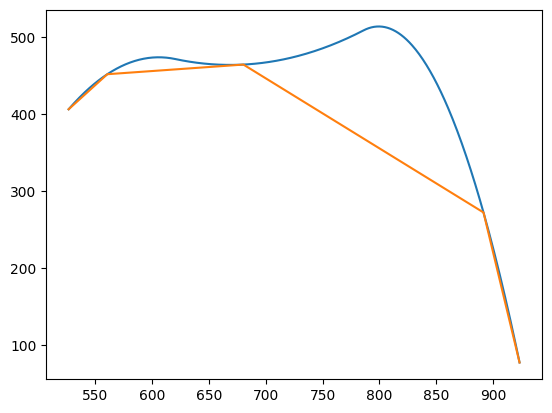

In [19]:
from scipy.interpolate import interp1d
x = data.iloc[1, 1::3]
y = data.iloc[1, 2::3]
f = interp1d(x, y, kind='quadratic')
x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = f(x_smooth)
plt.plot(x_smooth,y_smooth)
plt.plot(x,y)
# ax.set_xlim([x.iloc[-1]+500, x.iloc[-1]-500])
# ax.set_ylim([y.iloc[-1]-100, y.iloc[0]+500])
print()

[131.9784140936431, 131.8353663539185, 131.8186545894725, 131.70102399817642, 131.61734051630006, 131.659927455236, 131.6939699814927, 131.6190357642026, 131.57523826272646, 131.49164173513995, 131.48757382875436, 131.4721579279026, 131.43592016259075, 131.49057454216063, 131.49801377718327, 131.52063739871738, 131.5953875633596, 131.6715540093148, 131.75913799079444, 131.81519107885953, 131.8380332945081, 131.83991180339578, 131.82320137752458, 131.82396521545942, 131.8101005182337, 131.81927541694432, 131.80457585247612, 131.7712258792276, 131.76546727459007, 131.77059626217488, 131.68067793676846, 131.81338887486191, 131.59067907545707, 131.54634412912856, 130.95853777037047, 131.27501844874948, 131.21430676187885, 131.16771289888524, 131.2023974703534, 131.27503651615507, 129.51287849522964, 131.21010212306962, 129.33503460126565, 127.50377856445989, 131.0781556531855, 129.2546717058445, 130.97495164298527, 130.92688805348888, 130.8213310905294, 130.74419262586486, 130.670739846454

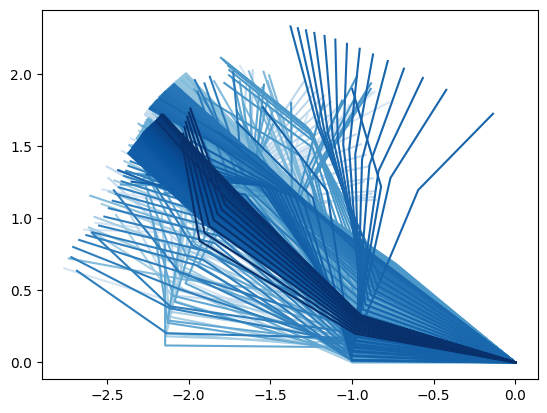

In [49]:
import matplotlib.colors as mcolors
print(mcpAngle)

f_x = np.array([0])
f_y = np.array([0])
w_x = np.zeros(len(mcpAngle))
w_y = np.zeros(len(mcpAngle))
m_x = np.zeros(len(mcpAngle))
m_y = np.zeros(len(mcpAngle))
p_x = np.zeros(len(mcpAngle))
p_y = np.zeros(len(mcpAngle))
d_x = np.zeros(len(mcpAngle))
d_y = np.zeros(len(mcpAngle))

cmap = plt.cm.Blues


def calcx(r, angle):
    return r* np.cos(np.radians(angle))
def calcy(r, angle):
    return r* np.sin(np.radians(angle))

for i in range(1000):
    w_x[i] = f_x + calcx(1,wristAngle[i])
    w_y[i] = f_y + calcy(1,wristAngle[i])

    m_x[i] = w_x[i] + calcx(1.15,mcpAngle[i])
    m_y[i] = w_y[i] + calcy(1.15,mcpAngle[i])

    p_x[i] = m_x[i] + calcx(0.4,pipAngle[i])
    p_y[i] = m_y[i] + calcy(0.4,pipAngle[i])

    d_x[i] = p_x[i] + calcx(0.3,pipAngle[i])
    d_y[i] = p_y[i] + calcy(0.3,pipAngle[i])

    normalized_index = i / (1000- 1)

    # Get the color for this frame
    color = cmap(normalized_index)

    plt.plot([f_x,w_x[i],m_x[i],p_x[i],d_x[i]],[ f_y,w_y[i],m_y[i],p_y[i],d_y[i]],color=color)


In [43]:
from matplotlib.animation import FFMpegWriter


angleName = ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm']
f_x = 0
f_y = 0
w_x = np.zeros(len(mcpAngle))
w_y = np.zeros(len(mcpAngle))
m_x = np.zeros(len(mcpAngle))
m_y = np.zeros(len(mcpAngle))
p_x = np.zeros(len(mcpAngle))
p_y = np.zeros(len(mcpAngle))
d_x = np.zeros(len(mcpAngle))
d_y = np.zeros(len(mcpAngle))

# Set up the writer object to write your video
writer = FFMpegWriter(fps=30)


# Create a figure for plotting
fig, ax = plt.subplots()


# Prepare the video file to write to
with writer.saving(fig, "muscleFatigueSkeleton.mp4", 100):


   # Loop over your data to create each frame
   for i in range(10):
      x = data.iloc[i, 1::3]
      y = data.iloc[i, 2::3]
      # print(x)

      w_x[i] = f_x + calcx(1,wristAngle[i])
      w_y[i] = f_y + calcy(1,wristAngle[i])

      m_x[i] = w_x[i] + calcx(1.15,mcpAngle[i])
      m_y[i] = w_y[i] + calcy(1.15,mcpAngle[i])

      p_x[i] = m_x[i] + calcx(0.4,pipAngle[i])
      p_y[i] = m_y[i] + calcy(0.4,pipAngle[i])

      d_x[i] = p_x[i] + calcx(0.3,pipAngle[i])
      d_y[i] = p_y[i] + calcy(0.3,pipAngle[i])


   #    f = interp1d(x, y, kind='quadratic')
   #    x_smooth = np.linspace(min(x), max(x), 500)
   #    y_smooth = f(x_smooth)


      # Clear the previous plot
      ax.clear()

      # print([f_x,w_x[i],m_x[i],p_x[i],d_x[i]])
      # Plot the current frame's data
      # ax.plot(x,y)
      ax.plot([f_x,w_x[i],m_x[i],p_x[i],d_x[i]],[ f_y,w_y[i],m_y[i],p_y[i],d_y[i]])


      # Add any additional plot formatting here (e.g., titles, labels)


   #    ax.set_xlim([x.iloc[-1]+500, x.iloc[-1]-500])
   #    ax.set_ylim([y.iloc[-1]-100, y.iloc[0]+500])


      for j, angle in enumerate(angleName):
         ax.text(x.iloc[j], y.iloc[j], angle, fontsize=10)
   
      ax.set_xlabel("x (pixels)")
      ax.set_ylabel("y (pixels)")
      ax.set_title("Muscle Fatigue Skeleton")


      # Write the current frame to the video
      writer.grab_frame()


ValueError: Image size of 205672x78418 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

# To do
- Figure out how to remove noisy movement from data
  - Interpolation or sliding average?
- Make a command curve for each electrode (across pulse width or amp? constant freq)
- Account for low likelihoods from DLC